# Laboratory Exercise 1 - Starter (2 points)

In this assignment, you will perform **web scraping** on the website [https://books.toscrape.com/](https://books.toscrape.com/).

Your tasks are as follows:

1. **Extract** `image_url`, `rating`, `title`, and `price` for the 20 books displayed on the main page.
2. **Organize the data** into a **pandas.DataFrame**.
3. **Visualize** the collected data according to the given requirements.

**Notes:**

- Some parts of the code are already provided. **Do not modify the existing code.**
- **Do not hard-code** any values or test data. There are hidden tests that will check your implementation.
- Write your solution only in the sections marked with `### YOUR SOLUTION`.
- Each task description indicates whether it is **automatically** or **manually graded**.
- You can verify automatically graded tasks using the cell labeled `### TEST` after each function.

***IMPORTANT NOTE:***
- Name your Jupyter Notebook as `lab_ex_1_{index}.ipynb`.
- For example, if your index is 123456, you should name your notebook as `lab_ex_1_12346.ipynb`.

In [3]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from bs4 import BeautifulSoup

In [4]:
url = "https://books.toscrape.com/"

In [5]:
response = requests.get(url)

In [6]:
page_element = BeautifulSoup(response.text, "html.parser")

In [7]:
product_elements = page_element.select("article.product_pod")
product_elements[0]

<article class="product_pod">
<div class="image_container">
<a href="catalogue/a-light-in-the-attic_1000/index.html"><img alt="A Light in the Attic" class="thumbnail" src="media/cache/2c/da/2cdad67c44b002e7ead0cc35693c0e8b.jpg"/></a>
</div>
<p class="star-rating Three">
<i class="icon-star"></i>
<i class="icon-star"></i>
<i class="icon-star"></i>
<i class="icon-star"></i>
<i class="icon-star"></i>
</p>
<h3><a href="catalogue/a-light-in-the-attic_1000/index.html" title="A Light in the Attic">A Light in the ...</a></h3>
<div class="product_price">
<p class="price_color">Â£51.77</p>
<p class="instock availability">
<i class="icon-ok"></i>
    
        In stock
    
</p>
<form>
<button class="btn btn-primary btn-block" data-loading-text="Adding..." type="submit">Add to basket</button>
</form>
</div>
</article>

**(0.2 points)** Implement the `get_image_url` function to return the image URL of a given product element using **BeautifulSoup**. For example, the first product on the page has the image URL `"media/cache/2c/da/2cdad67c44b002e7ead0cc35693c0e8b.jpg"`.

In [15]:
### AUTOMATICALLY GRADED TASK
def get_image_url(product_element):
    "Get the URL of the image from the given product element using BeautifulSoup."
    imageUrl = product_element.select_one(".thumbnail").get("src")
    return imageUrl
    # YOUR CODE HEREeee
    raise NotImplementedError()

Test your implementation by running the following cell.

In [16]:
### TEST
assert get_image_url(product_elements[0]) == "media/cache/2c/da/2cdad67c44b002e7ead0cc35693c0e8b.jpg"

**(0.2 points)** Implement the `get_rating` function to return the product’s rating as an integer between 1 and 5. For example, the first product on the page has a rating of `3`.

In [54]:
### AUTOMATICALLY GRADED TASK
def get_rating(product_element):
    "Get the rating (1-5) of the given product element."
    rating = product_element.select_one(".star-rating").get("class")[1]
    rating_dict = {"One": 1, "Two": 2, "Three": 3, "Four": 4, "Five": 5}
    return rating_dict[rating]
    # YOUR CODE HERE
    raise NotImplementedError()

Test your implementation by running the following cell.

In [58]:
### TEST
assert get_rating(product_elements[0]) == 3
# get_rating(product_elements[0])

**(0.2 points)** Implement the `get_title` function to return the full title of the given product as a string. For example, the first product on the page has the title `"A Light in the Attic"`.

In [99]:
### AUTOMATICALLY GRADED TASK
def get_title(product_element):
    "Get the full-length title of the given product element."
    title = product_element.select_one(".thumbnail").get("alt")
    return title
    # YOUR CODE HEREe
    raise NotImplementedError()

Test your implementation by running the following cell.

In [101]:
### TEST
assert get_title(product_elements[0]) == "A Light in the Attic"
# get_title(product_elements[0])

**(0.2 points)** Implement the `get_price` function to return the product’s price as a float. For example, the first product on the page has a price of `51.77`.

In [195]:
def get_price(product_element):
    "Get the price of the given product element."
 # <div class="product_price">
 # <p class="price_color">Â£47.82</p>
 # <p class="instock availability">
 # <i class="icon-ok"></i>
    # YOUR CODE HERE
    import re
    price_div = product_element.select_one(".price_color").text
    price = re.findall("\d+\.\d+", price_div)[0]
    return float(price)
    raise NotImplementedError()

Test your implementation by running the following cell.

In [197]:
### TEST
assert get_price(product_elements[0]) == 51.77
# get_price(product_elements[0])
# product_elements[0]

In [198]:
def get_attributes(product_element):
    return {
        "image_url": get_image_url(product_element),
        "rating": get_rating(product_element),
        "title": get_title(product_element),
        "price": get_price(product_element),
    }

In [199]:
get_attributes(product_elements[0])

{'image_url': 'media/cache/2c/da/2cdad67c44b002e7ead0cc35693c0e8b.jpg',
 'rating': 3,
 'title': 'A Light in the Attic',
 'price': 51.77}

In [200]:
product_data = [get_attributes(product_element) for product_element in product_elements]

In [201]:
df = pd.DataFrame(product_data)

In [202]:
df.head()

,image_url,rating,title,price
0,media/cache/2c/da/2cdad67c44b002e7ead0cc35693c...,3,A Light in the Attic,51.77
1,media/cache/26/0c/260c6ae16bce31c8f8c95daddd9f...,1,Tipping the Velvet,53.74
2,media/cache/3e/ef/3eef99c9d9adef34639f51066202...,1,Soumission,50.10
3,media/cache/32/51/3251cf3a3412f53f339e42cac213...,4,Sharp Objects,47.82
4,media/cache/be/a5/bea5697f2534a2f86a3ef27b5a8c...,5,Sapiens: A Brief History of Humankind,54.23


***If you were not able to complete the previous tasks successfully, you may uncomment the following line to continue with the next steps.***

In [ ]:
# df = pd.read_csv("products.csv")

**(0.2 points)** Create a visualization showing the number of products for each rating (1-5).

In [239]:
### MANUALLY GRADED TASK
def plot_counts_by_rating(df):
    "Plot the count of products by rating."""

    # YOUR CODE HERE
    df['rating'].value_counts().plot.bar()
    plt.ylabel('number of products')
    plt.show()

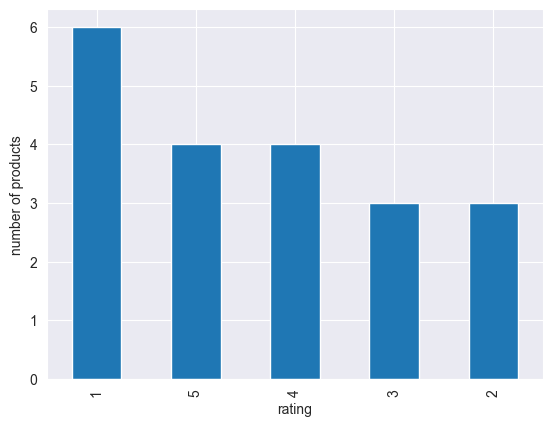

In [240]:
plot_counts_by_rating(df)

**(0.2 points)** Create a visualization showing the distribution of product prices.

In [266]:
### MANUALLY GRADED TASK
def plot_price_distribution(df):
    """Plot the price distribution of the products."""

    # YOUR CODE HERE
    sns.histplot(df['price'], bins=10, kde=True)
    plt.show()
    # raise NotImplementedError()

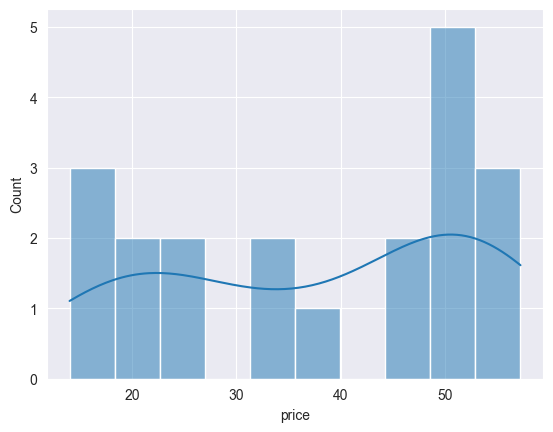

In [267]:
plot_price_distribution(df)

**(0.2 points)** Create a visualization showing the distribution of product title lengths.

In [273]:
### MANUALLY GRADED TASK
def plot_title_length_distribution(df):
    """Plot the distribution of the title lengths."""

    # YOUR CODE HERE
    df['title_length'] = df['title'].apply(len)
    sns.histplot(df['title_length'], bins=20, kde=True)
    plt.show()

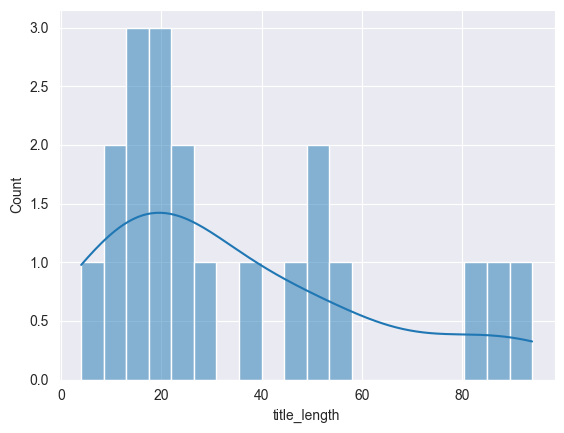

,image_url,rating,title,price,title_length
0,media/cache/2c/da/2cdad67c44b002e7ead0cc35693c...,3,A Light in the Attic,51.77,20
1,media/cache/26/0c/260c6ae16bce31c8f8c95daddd9f...,1,Tipping the Velvet,53.74,18
2,media/cache/3e/ef/3eef99c9d9adef34639f51066202...,1,Soumission,50.10,10
3,media/cache/32/51/3251cf3a3412f53f339e42cac213...,4,Sharp Objects,47.82,13
4,media/cache/be/a5/bea5697f2534a2f86a3ef27b5a8c...,5,Sapiens: A Brief History of Humankind,54.23,37
5,media/cache/68/33/68339b4c9bc034267e1da611ab3b...,1,The Requiem Red,22.65,15
6,media/cache/92/27/92274a95b7c251fea59a2b8a7827...,4,The Dirty Little Secrets of Getting Your Dream...,33.34,50
7,media/cache/3d/54/3d54940e57e662c4dd1f3ff00c78...,3,The Coming Woman: A Novel Based on the Life of...,17.93,87
8,media/cache/66/88/66883b91f6804b2323c8369331cb...,4,The Boys in the Boat: Nine Americans and Their...,22.60,94
9,media/cache/58/46/5846057e28022268153beff6d352...,1,The Black Maria,52.15,15


In [274]:
plot_title_length_distribution(df)
df

**(0.2 points)** Create box plots showing the distribution of product prices for each rating.

In [283]:
### MANUALLY GRADED ANSWER
def plot_price_distribution_per_rating(df):
    """Plot the price distribution of the products per rating."""

    # YOUR CODE HERE
    sns.boxplot(df, x='rating', y='price')
    plt.show()
    # raise NotImplementedError()

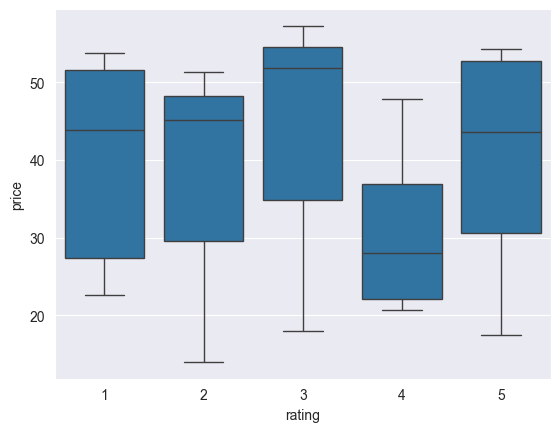

In [284]:
plot_price_distribution_per_rating(df)

**(0.2 points)** Create a heatmap showing the Pearson correlation between the numeric variables in the dataset.

In [290]:
### MANUALLY GRADED ANSWER
def plot_corr_heat_map(df):
    """Plot the Pearson correlation between the numeric variables in the dataset using a heat map."""

    # YOUR CODE HERE
    sns.heatmap(df.corr(numeric_only=True),annot=True)
    plt.show()
    # raise NotImplementedError()

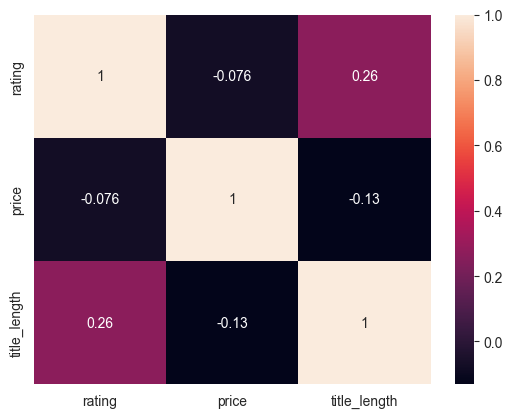

In [292]:
plot_corr_heat_map(df)

**(0.2 points)** Compute the `count`, `mean`, `std`, `min`, `25%`, `median`, `75%`, and `max` statistics of product prices grouped by rating (1-5).

In [295]:
### MANUALLY GRADED ANSWER
def compute_descriptive_stats_for_price_per_rating(df):
    """
    Compute the `count`, `mean`, `std`, `min`, `25% quantile`, `median`, `75% quantile`, and `max` statistics
    for the product's prices per rating (1-5). Return them as a `pandas.DataFrame`.
    """

    # YOUR CODE HERE
    grupirani = df.groupby(by=['rating'])[['price']].describe()
    return grupirani

    # raise NotImplementedError()

In [296]:
compute_descriptive_stats_for_price_per_rating(df)

price                                                              
       count       mean        std    min      25%     50%      75%    max
rating                                                                    
1        6.0  40.018333  14.178174  22.65  27.3075  43.845  51.6375  53.74
2        3.0  36.830000  20.018382  13.99  29.5800  45.170  48.2500  51.33
3        3.0  42.316667  21.296472  17.93  34.8500  51.770  54.5100  57.25
4        4.0  31.105000  12.460865  20.66  22.1150  27.970  36.9600  47.82
5        4.0  39.750000  17.186613  17.46  30.6300  43.655  52.7750  54.23